In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt  # Para el filtrado de mediana
from sklearn.cluster import KMeans


In [11]:

# Especificar el motor al leer el archivo
catalog_file_path = 'data\\lunar\\training\\catalogs\\apollo12_catalog_GradeA_final.csv'




In [24]:
# Verificar si el archivo existe
if os.path.exists(catalog_file_path):
    # Cargar el archivo CSV
    data_df = pd.read_csv(catalog_file_path)
    print("Datos cargados correctamente:")
    print(data_df.head())
else:
    print("El archivo no se encontró en la ruta especificada.")

Datos cargados correctamente:
                                 filename time_abs(%Y-%m-%dT%H:%M:%S.%f)  \
0  xa.s12.00.mhz.1970-01-19HR00_evid00002     1970-01-19T20:25:00.000000   
1  xa.s12.00.mhz.1970-03-25HR00_evid00003     1970-03-25T03:32:00.000000   
2  xa.s12.00.mhz.1970-03-26HR00_evid00004     1970-03-26T20:17:00.000000   
3  xa.s12.00.mhz.1970-04-25HR00_evid00006     1970-04-25T01:14:00.000000   
4  xa.s12.00.mhz.1970-04-26HR00_evid00007     1970-04-26T14:29:00.000000   

   time_rel(sec)       evid    mq_type  
0        73500.0  evid00002  impact_mq  
1        12720.0  evid00003  impact_mq  
2        73020.0  evid00004  impact_mq  
3         4440.0  evid00006  impact_mq  
4        52140.0  evid00007    deep_mq  


In [32]:
# Función para cargar todos los archivos CSV en un solo DataFrame
def combine_csv_files_with_origin(folder_path):
    all_data = []  # Lista para almacenar DataFrames
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):  # Solo archivos CSV
            file_path = os.path.join(folder_path, filename)
            data_df = pd.read_csv(file_path)  # Cargar el archivo CSV
            
            # Agregar una nueva columna para indicar el nombre del archivo
            data_df['source_file'] = filename
            
            # Añadir el DataFrame a la lista
            all_data.append(data_df)
    
    # Combinar todos los DataFrames en uno solo
    return pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()

In [33]:
# Rutas de las carpetas
impact_folder = 'data\\lunar\\training\\data\\S12_GradeA\\deep_mq'
shallow_folder = 'data\\lunar\\training\\data\\S12_GradeA\\Impact_mq'
deep_folder = 'data\\lunar\\training\\data\\S12_GradeA\\shallow_mq'

# Cargar y filtrar datos de cada categoría
impact_data = combine_csv_files_with_origin(impact_folder)
shallow_data = combine_csv_files_with_origin(shallow_folder)
deep_data = combine_csv_files_with_origin(deep_folder)





  time_abs(%Y-%m-%dT%H:%M:%S.%f)  time_rel(sec)  velocity(m/s)  \
0     1970-04-26T00:00:00.660000       0.000000  -1.583565e-16   
1     1970-04-26T00:00:00.810943       0.150943  -1.872995e-16   
2     1970-04-26T00:00:00.961887       0.301887  -2.007235e-16   
3     1970-04-26T00:00:01.112830       0.452830  -1.989497e-16   
4     1970-04-26T00:00:01.263774       0.603774  -1.857298e-16   

                                  source_file  
0  xa.s12.00.mhz.1970-04-26HR00_evid00007.csv  
1  xa.s12.00.mhz.1970-04-26HR00_evid00007.csv  
2  xa.s12.00.mhz.1970-04-26HR00_evid00007.csv  
3  xa.s12.00.mhz.1970-04-26HR00_evid00007.csv  
4  xa.s12.00.mhz.1970-04-26HR00_evid00007.csv  


In [37]:
# Asegúrate de que la columna 'time_abs' esté en el formato correcto (datetime)
impact_data['time_abs(%Y-%m-%dT%H:%M:%S.%f)'] = pd.to_datetime(impact_data['time_abs(%Y-%m-%dT%H:%M:%S.%f)'])

# Crear la gráfica

In [41]:
# Definir un umbral para considerar un evento como terremoto
threshold = 1.0  # Cambia este valor según sea necesario

# Filtrar los datos para encontrar terremotos
earthquake_events = impact_data[impact_data['velocity(m/s)'] >= threshold]

# Mostrar los eventos que cumplen con el criterio de terremoto
print("\nEventos que cumplen con el criterio de terremoto:")
print(earthquake_events)



Eventos que cumplen con el criterio de terremoto:
Empty DataFrame
Columns: [time_abs(%Y-%m-%dT%H:%M:%S.%f), time_rel(sec), velocity(m/s), source_file]
Index: []


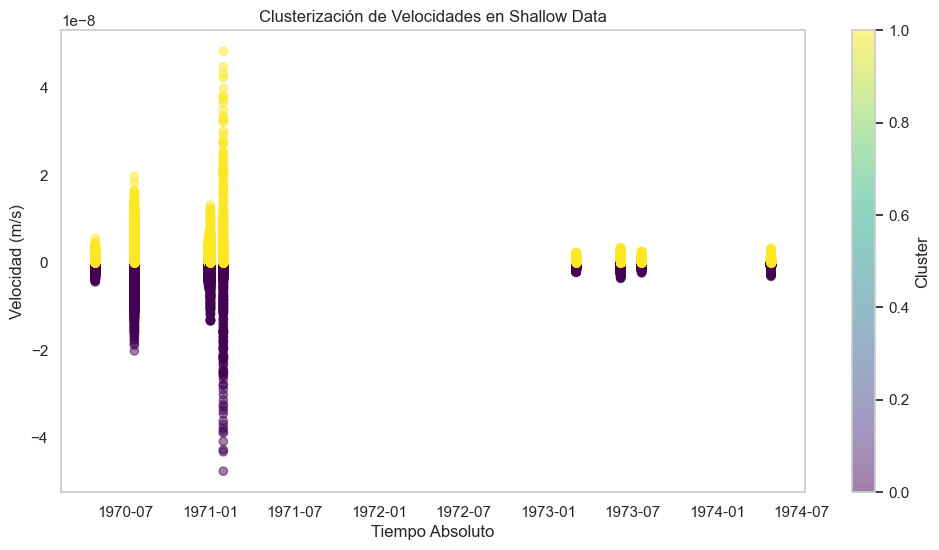

: 

In [45]:
X = impact_data[['velocity(m/s)']]

# Aplicar K-means
kmeans = KMeans(n_clusters=2)  # Dos clusters: uno para 'normal' y otro para 'terremoto'
kmeans.fit(X)

# Añadir la etiqueta de cluster al DataFrame
impact_data['cluster'] = kmeans.labels_

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.scatter(impact_data['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], 
            impact_data['velocity(m/s)'], 
            c=impact_data['cluster'], cmap='viridis', alpha=0.5)

plt.title('Clusterización de Velocidades en Shallow Data')
plt.xlabel('Tiempo Absoluto')
plt.ylabel('Velocidad (m/s)')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()
